In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipaddress
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency
from datetime import datetime, timedelta
import math
import missingno as msno
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('/Users/joshitha/Downloads/Data.xlsx', skiprows=[1])

In [3]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
new_df = df[['Q6 CODE', 'Q7 CODE', 'Q8 CODE', 'Q11 CODE', 'Q12 CODE','Q13 CODE', 'Q14 CODE', 'Q16 CODE', 'Q17 CODE', 'Q18 CODE','Q19 CODE', 'Q20 CODE', 'Q22 CODE', 'Q23 CODE','Q24 CODE', 'Q25 CODE', 'Q26 CODE','Q27 CODE', 'Q28 CODE', 'Q29 CODE', 'Q30 CODE']]

# Instantiate
scaler = StandardScaler()

# fit_transform
df_scaled = scaler.fit_transform(new_df)
df_scaled.shape

(363, 21)

In [4]:
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = ['Q6', 'Q7', 'Q8','Q11',
      'Q12', 'Q13', 'Q14', 'Q16', 'Q17', 'Q18',
      'Q19', 'Q20', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26',
      'Q27', 'Q28', 'Q29', 'Q30']
df_scaled.head()

,Q6,Q7,Q8,Q11,Q12,Q13,Q14,Q16,Q17,Q18,...,Q20,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30
0,-3.317311,0.144313,-1.063539,-1.032427,0.806652,0.506976,0.346406,-1.470794,-2.451908,-1.604691,...,-2.702288,-1.189570,3.797906,-1.021376,0.32979,-1.287105,0.953320,-0.976022,-2.631852,-3.143574
1,-2.675080,0.144313,0.828935,-1.032427,0.806652,0.506976,0.346406,1.242793,0.461488,0.244524,...,-0.780779,-1.189570,-0.696438,-0.157135,-0.65147,1.133720,-0.447713,-0.976022,-0.261226,0.791313
2,1.178309,0.871892,-1.063539,-1.032427,0.806652,0.506976,0.346406,0.564396,-2.451908,1.169132,...,1.140731,-1.189570,-0.696438,-1.021376,-0.65147,1.133720,-0.447713,-1.754694,-0.261226,0.791313
3,0.536078,0.144313,0.828935,-0.131535,0.806652,0.506976,0.346406,1.242793,0.461488,-0.680083,...,1.140731,1.763004,-0.696438,-1.021376,-0.65147,-2.094047,-0.447713,1.359995,0.924087,0.791313
4,0.536078,0.144313,-1.063539,-1.032427,0.806652,0.506976,0.346406,-0.114001,0.461488,-0.680083,...,0.179976,0.286717,0.427148,0.707107,0.32979,-0.480164,0.953320,0.581323,0.924087,-0.192408


In [5]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [6]:
kmeans.labels_

array([1, 0, 0, 0, 3, 1, 1, 1, 1, 3, 1, 1, 3, 3, 3, 0, 0, 0, 0, 3, 0, 0,
       0, 3, 1, 1, 2, 0, 3, 0, 2, 0, 0, 3, 3, 3, 3, 0, 0, 3, 2, 3, 0, 3,
       3, 3, 0, 3, 1, 0, 0, 1, 2, 0, 3, 0, 3, 0, 0, 0, 3, 0, 1, 0, 1, 2,
       1, 3, 1, 2, 0, 1, 2, 3, 0, 3, 3, 2, 1, 1, 3, 0, 3, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 3, 0, 0, 2, 1,
       0, 0, 1, 3, 1, 1, 0, 3, 0, 2, 2, 0, 0, 3, 0, 0, 0, 1, 0, 0, 2, 0,
       0, 2, 3, 0, 0, 1, 1, 0, 2, 1, 0, 0, 0, 3, 1, 2, 1, 1, 3, 1, 0, 0,
       0, 2, 1, 2, 0, 0, 2, 1, 0, 0, 0, 2, 2, 0, 1, 3, 3, 3, 3, 0, 3, 2,
       2, 1, 0, 0, 3, 2, 3, 0, 0, 1, 2, 0, 3, 0, 2, 1, 0, 1, 2, 2, 2, 1,
       0, 0, 0, 1, 3, 3, 0, 1, 2, 3, 3, 3, 1, 0, 1, 2, 2, 0, 1, 3, 3, 1,
       2, 0, 1, 3, 0, 3, 0, 3, 3, 0, 0, 0, 3, 0, 0, 2, 3, 1, 0, 3, 2, 0,
       0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 0, 0, 1, 0, 0, 0, 1, 1, 1, 2, 0, 2,
       0, 1, 1, 1, 2, 0, 0, 3, 2, 0, 3, 0, 2, 2, 3, 3, 0, 0, 0, 3, 0, 0,
       1, 0, 3, 1, 2, 1, 1, 1, 3, 2, 1, 0, 2, 1, 2,

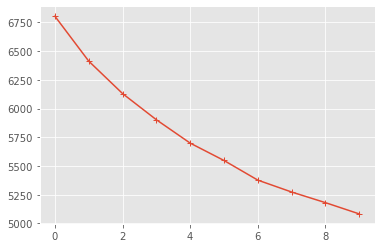

In [7]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd, marker="+")

In [8]:
features = ['Q6', 'Q7', 'Q8', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q16', 'Q17', 'Q18',
       'Q19', 'Q20', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26',
       'Q27', 'Q28', 'Q29', 'Q30']
# Making categorical variables into numeric representation

print(df.shape)
raw_data = df[features]
# Making categorical variables into numeric representation
new_raw_data = pd.get_dummies(raw_data, columns = features)

# Notes:
# We can also do this with Label Encoding and OneHotEncoder from the preprocessing library

print(new_raw_data.shape)
# print the shape

new_raw_data.head()

(363, 69)
(363, 108)


,Q6_-,Q6_18-24 years old,Q6_25-34 years old,Q6_35-44 years old,Q6_45-54 years old,Q6_55-64 years old,Q6_65-74 years old,Q6_75 years old or older,Q6_Prefer not to disclose,Q7_Associate degree,...,Q29_Always,Q29_Never,Q29_Often,Q29_Rarely,Q29_Sometimes,Q30_Always,Q30_Never,Q30_Often,Q30_Rarely,Q30_Sometimes
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

from sklearn.cluster import KMeans, k_means
X_train = new_raw_data.values

# We wills start with 5 clusters

kmeans = KMeans(n_clusters=4, random_state=540)
kmeans = kmeans.fit(X_train)

# Prints the clusters it assigned to each observation
print("The clusters are: ", kmeans.labels_)

# Prints the Inertia
print("The Inertia is: ", kmeans.inertia_)

The clusters are:  [2 3 1 1 2 2 2 2 3 2 2 3 1 1 2 1 3 1 1 2 3 1 3 2 2 2 0 1 3 1 2 1 3 3 2 2 0
 1 1 3 0 1 3 3 2 1 1 2 2 1 3 2 2 3 2 1 2 3 3 1 3 1 2 1 0 2 1 1 2 0 3 2 0 1
 3 3 2 0 0 3 2 1 0 3 3 3 2 1 3 3 3 3 1 1 3 0 1 1 1 2 2 0 1 1 3 3 3 1 2 3 2
 3 3 0 1 3 1 1 1 0 2 1 1 1 1 1 3 0 3 3 0 3 1 0 2 1 1 3 2 3 1 2 1 3 3 2 2 0
 2 2 3 2 3 2 3 0 2 0 1 1 0 2 1 3 3 1 2 1 0 1 2 2 2 1 2 0 0 3 3 3 2 0 1 3 1
 0 2 1 2 1 0 2 3 2 0 3 0 3 1 1 1 3 3 0 3 2 2 1 1 3 3 3 3 0 0 1 0 2 1 2 1 3
 2 2 3 2 1 2 2 1 3 1 3 1 1 0 2 2 1 2 0 2 3 2 3 1 2 1 2 2 2 1 1 3 2 1 1 1 2
 2 2 0 1 0 1 1 2 2 3 1 3 3 2 1 3 1 0 2 3 3 1 1 1 1 1 1 2 1 2 2 2 2 2 2 2 1
 2 1 3 0 2 3 2 3 2 2 2 2 3 0 0 2 3 3 3 3 2 2 1 2 3 1 3 2 2 0 1 3 3 0 0 0 2
 2 1 3 1 0 2 3 1 3 2 2 0 2 2 2 2 1 3 3 0 3 2 1 0 1 2 2 3 2 2]
The Inertia is:  4193.6359428079495


In [10]:
no_of_clusters = range(2,20) #[2,3,4,5,6,7,8,9]
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

The innertia for : 2 Clusters is: 4399.575409221546
The innertia for : 3 Clusters is: 4272.6044933169005
The innertia for : 4 Clusters is: 4187.106844356843
The innertia for : 5 Clusters is: 4119.0380802749605
The innertia for : 6 Clusters is: 4057.6843792956693
The innertia for : 7 Clusters is: 3995.579912984003
The innertia for : 8 Clusters is: 3946.9490263835464
The innertia for : 9 Clusters is: 3909.775480029668
The innertia for : 10 Clusters is: 3859.518120203163
The innertia for : 11 Clusters is: 3822.888591060101
The innertia for : 12 Clusters is: 3764.283984386251
The innertia for : 13 Clusters is: 3750.3735452409396
The innertia for : 14 Clusters is: 3725.169462239972
The innertia for : 15 Clusters is: 3700.790141140552
The innertia for : 16 Clusters is: 3669.3936388815373
The innertia for : 17 Clusters is: 3634.666550559862
The innertia for : 18 Clusters is: 3605.9203292637226
The innertia for : 19 Clusters is: 3593.424340195186


Text(0.5, 1.0, 'Inertia Plot per k')

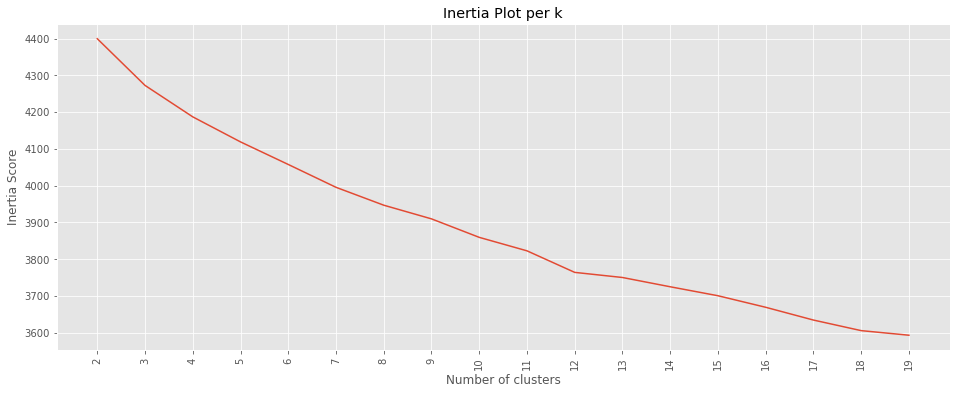

In [11]:
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [12]:
kmeans = KMeans(n_clusters=4, random_state=2)
kmeans = kmeans.fit(X_train)


kmeans.labels_

# "predictions" for new data
predictions = kmeans.predict(X_train)

# calculating the Counts of the cluster
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,4)

# Creating a datagrame
countscldf = pd.DataFrame(counts, columns = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3"])

# display
countscldf

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
0,84,117,74,88


In [13]:
kmeans.labels_

array([0, 1, 1, 1, 3, 0, 0, 0, 3, 3, 0, 2, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1,
       2, 0, 0, 3, 2, 1, 2, 1, 3, 1, 0, 3, 3, 0, 2, 1, 1, 2, 2, 1, 2, 3,
       3, 1, 1, 0, 0, 1, 2, 3, 0, 2, 3, 1, 0, 3, 3, 1, 3, 1, 3, 1, 0, 3,
       1, 1, 0, 2, 3, 0, 0, 1, 1, 3, 3, 2, 0, 3, 3, 1, 2, 1, 0, 3, 0, 1,
       1, 1, 2, 3, 1, 1, 3, 2, 1, 1, 1, 0, 3, 2, 1, 1, 2, 2, 3, 1, 2, 0,
       3, 2, 3, 3, 1, 3, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 3, 2, 1, 1, 2, 1,
       1, 2, 3, 1, 1, 0, 0, 3, 1, 0, 1, 2, 3, 2, 0, 2, 0, 0, 3, 0, 1, 3,
       2, 2, 0, 2, 1, 1, 2, 0, 1, 2, 2, 1, 3, 1, 3, 1, 3, 3, 0, 1, 3, 0,
       2, 0, 1, 3, 3, 2, 1, 0, 1, 2, 3, 1, 0, 1, 2, 0, 3, 3, 2, 2, 2, 3,
       1, 1, 1, 1, 3, 2, 1, 0, 3, 1, 1, 0, 1, 2, 2, 2, 2, 1, 3, 3, 1, 0,
       2, 0, 0, 0, 1, 3, 1, 0, 2, 1, 2, 1, 0, 1, 1, 2, 0, 0, 1, 0, 2, 3,
       3, 0, 2, 1, 3, 1, 3, 0, 3, 1, 1, 3, 0, 1, 1, 1, 0, 0, 0, 2, 1, 2,
       1, 1, 0, 0, 3, 1, 2, 0, 0, 1, 0, 1, 2, 3, 2, 0, 1, 1, 1, 1, 1, 1,
       3, 1, 0, 0, 3, 0, 0, 0, 0, 2, 0, 1, 2, 2, 3,

In [14]:
predictions

array([0, 1, 1, 1, 3, 0, 0, 0, 3, 3, 0, 2, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1,
       2, 0, 0, 3, 2, 1, 2, 1, 3, 1, 0, 3, 3, 0, 2, 1, 1, 2, 2, 1, 2, 3,
       3, 1, 1, 0, 0, 1, 2, 3, 0, 2, 3, 1, 0, 3, 3, 1, 3, 1, 3, 1, 0, 3,
       1, 1, 0, 2, 3, 0, 0, 1, 1, 3, 3, 2, 0, 3, 3, 1, 2, 1, 0, 3, 0, 1,
       1, 1, 2, 3, 1, 1, 3, 2, 1, 1, 1, 0, 3, 2, 1, 1, 2, 2, 3, 1, 2, 0,
       3, 2, 3, 3, 1, 3, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 3, 2, 1, 1, 2, 1,
       1, 2, 3, 1, 1, 0, 0, 3, 1, 0, 1, 2, 3, 2, 0, 2, 0, 0, 3, 0, 1, 3,
       2, 2, 0, 2, 1, 1, 2, 0, 1, 2, 2, 1, 3, 1, 3, 1, 3, 3, 0, 1, 3, 0,
       2, 0, 1, 3, 3, 2, 1, 0, 1, 2, 3, 1, 0, 1, 2, 0, 3, 3, 2, 2, 2, 3,
       1, 1, 1, 1, 3, 2, 1, 0, 3, 1, 1, 0, 1, 2, 2, 2, 2, 1, 3, 3, 1, 0,
       2, 0, 0, 0, 1, 3, 1, 0, 2, 1, 2, 1, 0, 1, 1, 2, 0, 0, 1, 0, 2, 3,
       3, 0, 2, 1, 3, 1, 3, 0, 3, 1, 1, 3, 0, 1, 1, 1, 0, 0, 0, 2, 1, 2,
       1, 1, 0, 0, 3, 1, 2, 0, 0, 1, 0, 1, 2, 3, 2, 0, 1, 1, 1, 1, 1, 1,
       3, 1, 0, 0, 3, 0, 0, 0, 0, 2, 0, 1, 2, 2, 3,

Explained variance ratio (first two components): [0.09903858 0.04520143]


<Figure size 432x288 with 0 Axes>

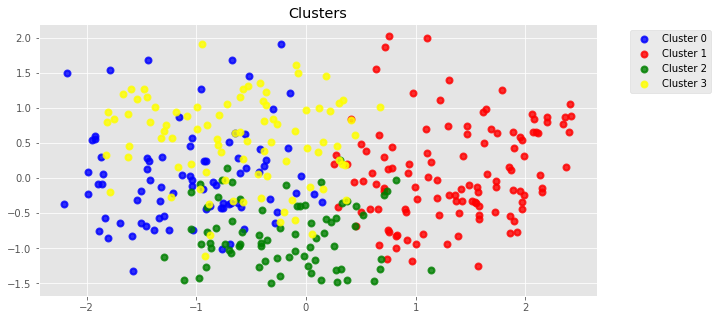

In [15]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = X_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3"]

pca = PCA(n_components=2, random_state = 500)
X_r = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(10,5))
colors = ['blue', 'red', 'green', 'yellow']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=3)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('Clusters')
plt.show()

kmeans = KMeans(n_clusters=4)
kmeans.fit(df_scaled)
labels = kmeans.labels_

clusters=pd.concat([new_df, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()
clusters.to_excel('file2.xlsx')